In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [4]:
df.drop(columns=['agent', 'company', 'reservation_status'],inplace=True)

In [5]:
df.dropna(axis=0,inplace=True)

In [6]:
df.shape

(118898, 29)

In [7]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [8]:
df['meal'].value_counts()

BB           91863
HB           14434
SC           10638
Undefined     1165
FB             798
Name: meal, dtype: int64

In [9]:
# "meal" contains values "Undefined", which is equal to SC
df['meal'].replace('Undefined','SC',inplace=True)

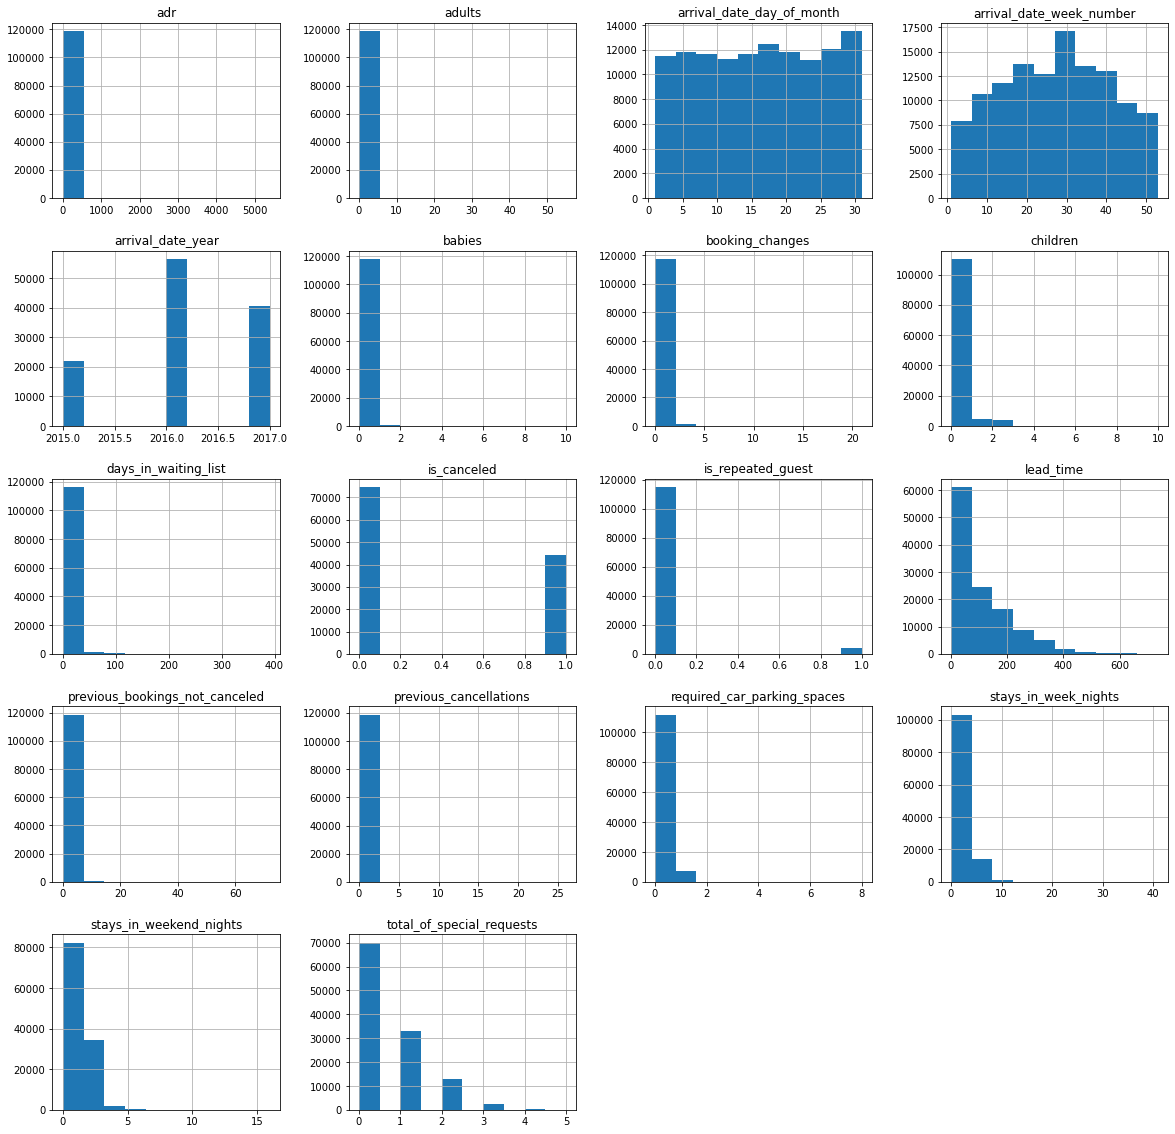

In [12]:
df.hist(figsize=(20,20))
plt.show()

In [13]:
cat_cols=['is_canceled','arrival_date_month','meal','market_segment','distribution_channel','reserved_room_type',
      'is_repeated_guest','deposit_type','customer_type']
df[cat_cols] = df[cat_cols].astype('category')
num_cols = ['lead_time','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights',
        'adults','children','babies','previous_cancellations','previous_bookings_not_canceled','required_car_parking_spaces',
        'total_of_special_requests','adr']

In [14]:
model_df = df[cat_cols+num_cols]
model_df.shape

(118898, 22)

In [15]:
model_df.corr()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,required_car_parking_spaces,total_of_special_requests,adr
lead_time,1.000000,0.126738,0.002320,0.083984,0.164783,0.116799,-0.038335,-0.021149,0.085961,-0.071128,-0.115561,-0.096536,-0.066381
arrival_date_week_number,0.126738,1.000000,0.066839,0.017642,0.015007,0.025394,0.005494,0.010039,0.035367,-0.020768,0.001717,0.025778,0.075277
arrival_date_day_of_month,0.002320,0.066839,1.000000,-0.015920,-0.027608,-0.001837,0.014562,-0.000539,-0.027013,0.000118,0.008262,0.003082,0.029923
stays_in_weekend_nights,0.083984,0.017642,-0.015920,1.000000,0.494888,0.090410,0.045430,0.018396,-0.013008,-0.040597,-0.018147,0.071669,0.047300
stays_in_week_nights,0.164783,0.015007,-0.027608,0.494888,1.000000,0.091999,0.044259,0.020157,-0.014274,-0.047367,-0.024378,0.066785,0.063628
adults,0.116799,0.025394,-0.001837,0.090410,0.091999,1.000000,0.029590,0.017887,-0.006974,-0.105028,0.016370,0.121815,0.227480
children,-0.038335,0.005494,0.014562,0.045430,0.044259,0.029590,1.000000,0.024131,-0.024752,-0.020364,0.057060,0.081786,0.325034
babies,-0.021149,0.010039,-0.000539,0.018396,0.020157,0.017887,0.024131,1.000000,-0.007489,-0.006306,0.036971,0.097601,0.028591
previous_cancellations,0.085961,0.035367,-0.027013,-0.013008,-0.014274,-0.006974,-0.024752,-0.007489,1.000000,0.154285,-0.018455,-0.048585,-0.065930
previous_bookings_not_canceled,-0.071128,-0.020768,0.000118,-0.040597,-0.047367,-0.105028,-0.020364,-0.006306,0.154285,1.000000,0.046945,0.037595,-0.069638


In [16]:
df_dummies = pd.get_dummies(model_df.drop(columns=['is_canceled']))

In [17]:
df_dummies.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,...,reserved_room_type_P,is_repeated_guest_0,is_repeated_guest_1,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,342,27,1,0,0,2,0.0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1,737,27,1,0,0,2,0.0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,7,27,1,0,1,1,0.0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3,13,27,1,0,1,1,0.0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4,14,27,1,0,2,2,0.0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [18]:
y = model_df['is_canceled']
X = df_dummies

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
sc = StandardScaler()

sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_std, y_train)
y_lr_pred = lr.predict(X_test_std)

print('Accuracy: %.4f' % accuracy_score(y_test, y_lr_pred))
print(confusion_matrix(y_test, y_lr_pred))
print(classification_report(y_test,y_lr_pred))

C:\Users\ITJEN KKP 405\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8072
[[20941  1392]
 [ 5486  7851]]
              precision    recall  f1-score   support

           0       0.79      0.94      0.86     22333
           1       0.85      0.59      0.70     13337

    accuracy                           0.81     35670
   macro avg       0.82      0.76      0.78     35670
weighted avg       0.81      0.81      0.80     35670



In [23]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train_std, y_train)
y_clf_pred = clf.predict(X_test_std)

print('Accuracy: %.4f' % accuracy_score(y_test, y_clf_pred))
print(confusion_matrix(y_test, y_clf_pred))
print(classification_report(y_test,y_clf_pred))

Accuracy: 0.8107
[[18916  3417]
 [ 3335 10002]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     22333
           1       0.75      0.75      0.75     13337

    accuracy                           0.81     35670
   macro avg       0.80      0.80      0.80     35670
weighted avg       0.81      0.81      0.81     35670



In [24]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train_std, y_train)
y_ada_pred = ada.predict(X_test_std)

print('Accuracy: %.4f' % accuracy_score(y_test, y_ada_pred))
print(confusion_matrix(y_test, y_ada_pred))
print(classification_report(y_test,y_ada_pred))

Accuracy: 0.8108
[[20704  1629]
 [ 5121  8216]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86     22333
           1       0.83      0.62      0.71     13337

    accuracy                           0.81     35670
   macro avg       0.82      0.77      0.78     35670
weighted avg       0.81      0.81      0.80     35670



In [25]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train_std, y_train)
y_gbc_pred = gbc.predict(X_test_std)

print('Accuracy: %.4f' % accuracy_score(y_test, y_gbc_pred))
print(confusion_matrix(y_test, y_gbc_pred))
print(classification_report(y_test,y_gbc_pred))

Accuracy: 0.8121
[[20766  1567]
 [ 5135  8202]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86     22333
           1       0.84      0.61      0.71     13337

    accuracy                           0.81     35670
   macro avg       0.82      0.77      0.79     35670
weighted avg       0.82      0.81      0.80     35670



In [26]:
from sklearn.ensemble import RandomForestClassifier

rfl = RandomForestClassifier()
rfl.fit(X_train_std, y_train)
y_rfl_pred = rfl.predict(X_test_std)

print('Accuracy: %.4f' % accuracy_score(y_test, y_rfl_pred))
print(confusion_matrix(y_test, y_rfl_pred))
print(classification_report(y_test,y_rfl_pred))

Accuracy: 0.8562
[[20610  1723]
 [ 3408  9929]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     22333
           1       0.85      0.74      0.79     13337

    accuracy                           0.86     35670
   macro avg       0.86      0.83      0.84     35670
weighted avg       0.86      0.86      0.85     35670

